In [33]:
!pip install zipfile36
import zipfile36
import os
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("russian")
import re
from nltk.tokenize import word_tokenize
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
zip_corpus = zipfile36.ZipFile('corpus_news_clean.zip', 'r')
zip_corpus.extractall('corpus_data')

In [16]:
def extract_data(info):
    data = []
    for file in os.listdir(info):
        text = open(os.path.join(info, file), 'r', encoding = 'utf-8').read()
        data.append(text)
    return data

In [17]:
culture = extract_data('corpus_data/corpus/culture')
hi_tech = extract_data('corpus_data/corpus/hi-tech')
politics = extract_data('corpus_data/corpus/politics')
science = extract_data('corpus_data/corpus/science')

In [30]:
data = pd.DataFrame(columns=['text', 'lable'])

In [37]:
def data(texts, labels, filepath, labelname):
  for path in filepath:
      texts.append(path)
      labels.append(labelname)

In [38]:
texts = []
labels = []
data(texts, labels, culture, 1)
data(texts, labels, hi_tech, 2)
data(texts, labels, politics, 3)
data(texts, labels, science, 4)

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score

Алгоритмы: Kmeans, Spectral Clustering, Ward Hierarchical Clustering, Affinity Propagation, Agglomerative Clustering, DBSCAN

In [28]:
from sklearn.cluster import KMeans, SpectralClustering, AffinityPropagation, AgglomerativeClustering, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA

Без лемматизации

In [41]:
vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

In [42]:
data = vectorizer.fit_transform(texts)
data = tfidf.fit_transform(data)

In [43]:
pca = PCA(n_components = 2)
X = pca.fit_transform(data.toarray())

In [44]:
kmeans = KMeans(n_clusters=4)
predicted = kmeans.fit_predict(X)

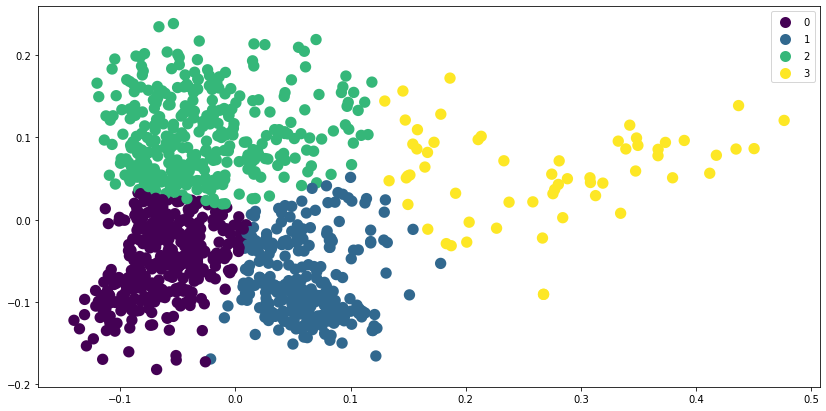

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

In [46]:
import numpy as np
y_true = np.asarray(labels)
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.445517213184544
Homogeneity score: 0.47390777002886647
Completeness score: 0.5023838754644124
V-measure score: 0.4877305326104801


In [47]:
clstr = SpectralClustering(n_clusters=4)
predicted = clstr.fit_predict(X)

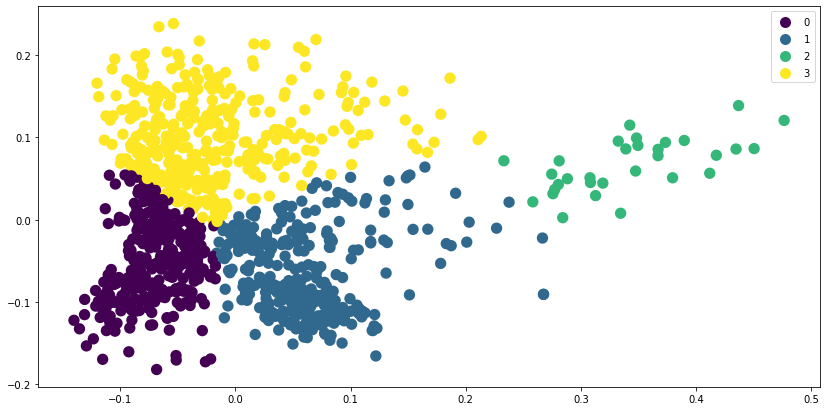

In [48]:
plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())


In [49]:
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.4208073628114171
Homogeneity score: 0.43455409048265614
Completeness score: 0.48042037476566957
V-measure score: 0.4563376289391249


In [50]:
affprop = AffinityPropagation(damping=0.7, convergence_iter=1)

affprop.fit(X)
predicted = affprop.fit_predict(X)

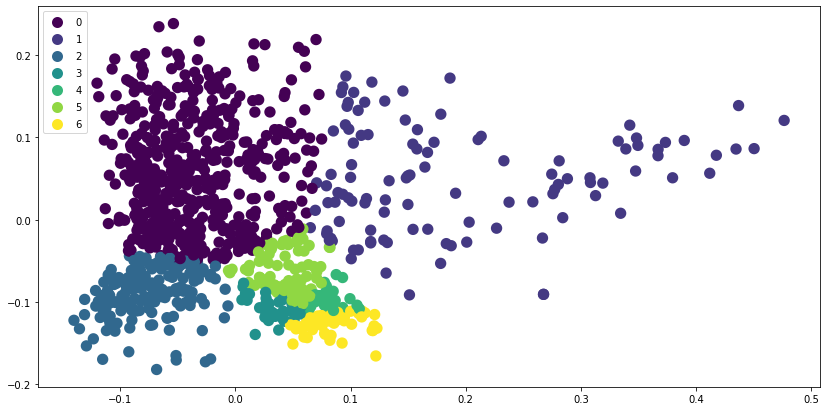

In [51]:
plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

In [52]:
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.2530850191694097
Homogeneity score: 0.46918506755985034
Completeness score: 0.41892468988862247
V-measure score: 0.4426326977705489


In [53]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [54]:
dbscan =  DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)
predicted = dbscan.fit_predict(X)

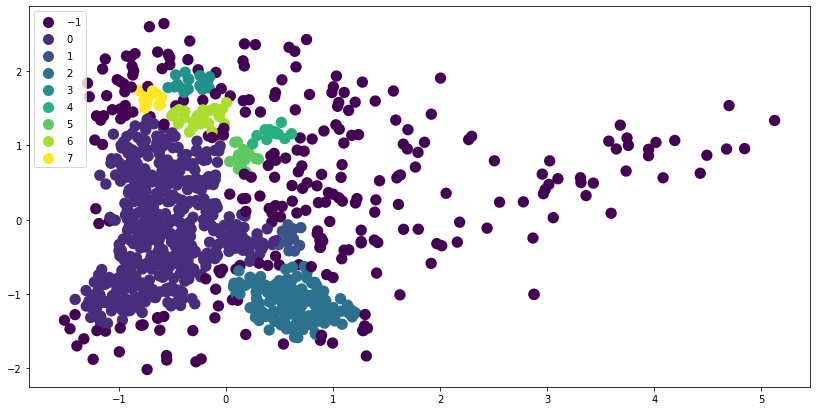

In [55]:
plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

In [56]:
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.013914223946348014
Homogeneity score: 0.2951103374368644
Completeness score: 0.28482385547872874
V-measure score: 0.2898758691147914


In [57]:
aggl = AgglomerativeClustering(n_clusters=4)

aggl.fit(X)
predicted = aggl.fit_predict(X)

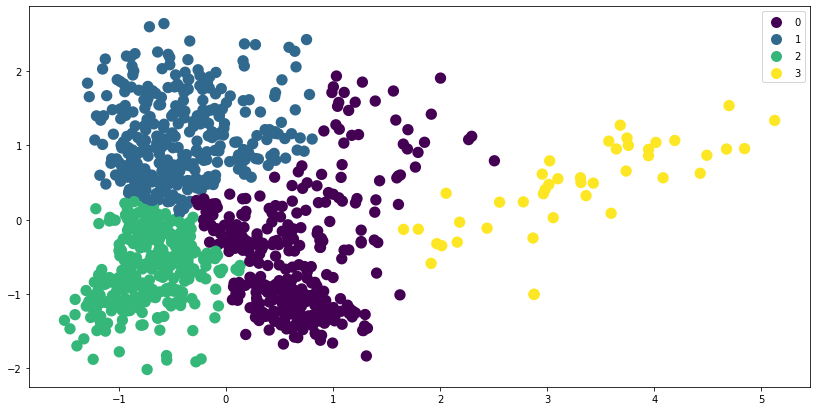

In [58]:
plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

In [59]:
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.4089675165655173
Homogeneity score: 0.41185404537220105
Completeness score: 0.4457521554909647
V-measure score: 0.42813316481983743


С лемматизацией

In [60]:
def clean_data(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    clean_text = []
    for word in tokens:
            word = morph.parse(word)[0].normal_form
            clean_text.append(word)
    clean_text = ' '.join(clean_text) 
    
    return clean_text 

In [61]:
data_clean = []
for sent in texts:
    data_clean.append(clean_data(sent))

In [62]:
data = vectorizer.fit_transform(data_clean)
data = tfidf.fit_transform(data)
X = pca.fit_transform(data.toarray())

Silhouette score: 0.4287583962639333
Homogeneity score: 0.48740680635467776
Completeness score: 0.5256592137986343
V-measure score: 0.5058108228518605


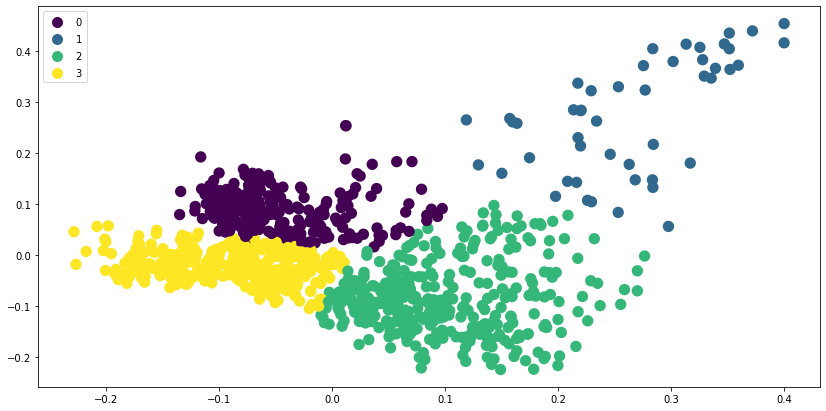

In [63]:
kmeans = KMeans(n_clusters=4)
predicted = kmeans.fit_predict(X)

plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.3896659552437149
Homogeneity score: 0.41904994907940074
Completeness score: 0.4666675069322476
V-measure score: 0.44157873075586634


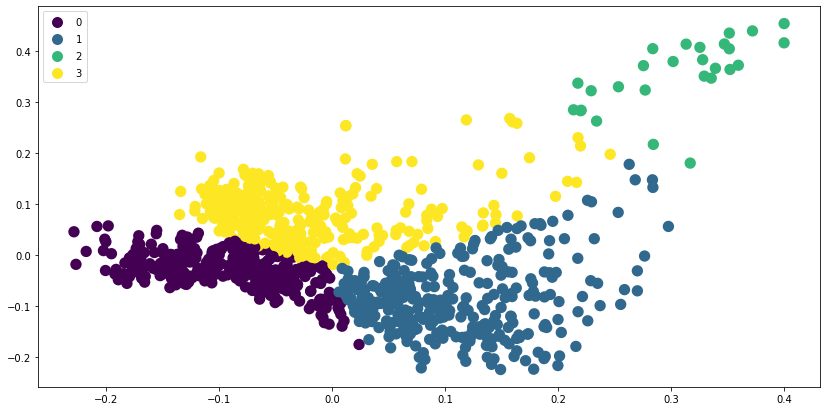

In [64]:
clstr = SpectralClustering(n_clusters=4)
predicted = clstr.fit_predict(X)

plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

y_true = np.asarray(labels)
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.10398082746749265
Homogeneity score: 0.7529702568293423
Completeness score: 0.29871472455949644
V-measure score: 0.4277389272465222


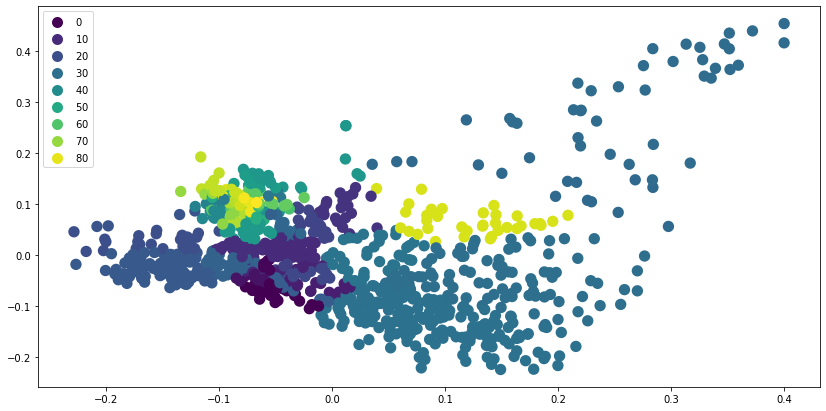

In [65]:
affprop = AffinityPropagation(damping=0.7, convergence_iter=1)

affprop.fit(X)
predicted = affprop.fit_predict(X)

plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())
y_true = np.asarray(labels)
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

In [66]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

Silhouette score: 0.23522081564585842
Homogeneity score: 0.3454416065658456
Completeness score: 0.4153816233687267
V-measure score: 0.3771969352901107


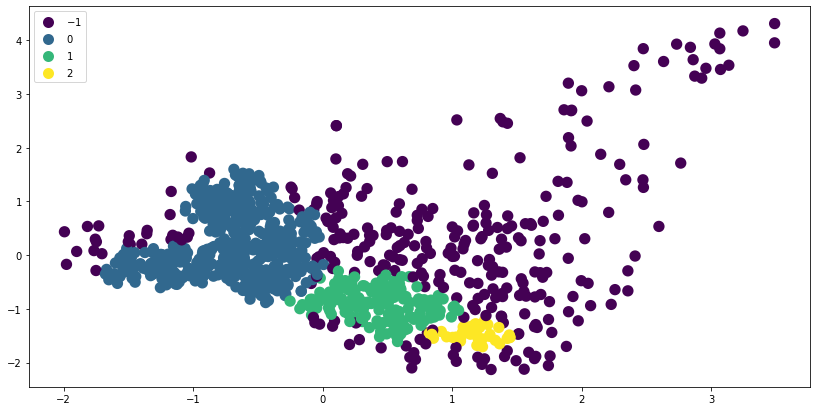

In [67]:
dbscan =  DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)
predicted = dbscan.fit_predict(X)

plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())

sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')

Silhouette score: 0.35506387264121625
Homogeneity score: 0.37904105480678313
Completeness score: 0.436644815486654
V-measure score: 0.4058089454913197


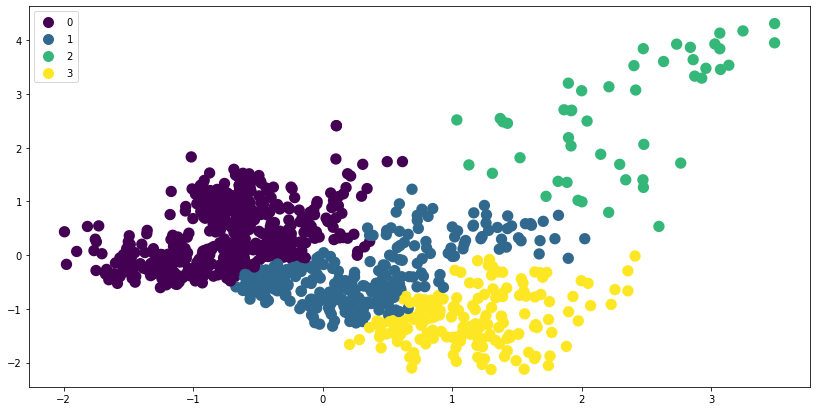

In [68]:
aggl = AgglomerativeClustering(n_clusters=4)

aggl.fit(X)
predicted = aggl.fit_predict(X)
plt.figure(figsize=(14, 7))

scat = plt.scatter(X[:, 0], X[:, 1], c=predicted, s=40, cmap='viridis', linewidths=5)
plt.legend(*scat.legend_elements())
sil_sc = silhouette_score(X, predicted, metric='euclidean')
hom_sc = homogeneity_score(y_true, predicted)
comp_sc = completeness_score(y_true, predicted)
v_sc = v_measure_score(y_true, predicted)
print(f'Silhouette score: {sil_sc}')
print(f'Homogeneity score: {hom_sc}')
print(f'Completeness score: {comp_sc}')
print(f'V-measure score: {v_sc}')